## Homework 4

Use this notebook as a starter

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv")

## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [13]:
#df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

Some of the features are encoded as numbers. Use the following code to de-code them:

In [14]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [15]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


Prepare the numerical variables:

In [16]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [17]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [18]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [21]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price,default
count,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000
mean,7.986753,46.438707,37.080377,55.573417,129.567580,5346.954872,341.639650,1038.918276,1462.780198,0.281545
std,8.174306,14.655462,10.984598,19.515634,86.793732,11526.410991,1243.661172,474.545999,628.128120,0.449803
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000,0.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.250000,0.000000
50%,5.000000,48.000000,36.000000,51.000000,119.000000,3000.000000,0.000000,1000.000000,1400.000000,0.000000
75%,12.000000,60.000000,45.000000,72.000000,164.000000,6000.000000,0.000000,1300.000000,1691.500000,1.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,1.000000


## Your code

What are the categorical variables? What are the numerical?

In [22]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [23]:
df.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'default'],
      dtype='object')

In [24]:
categorical = [
    'home', 'marital', 'records', 'job'
]
numerical = [
    'seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'default'
]

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [29]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [32]:
from sklearn.metrics import roc_auc_score

In [59]:
scores = []
for n in numerical:
    model_output = df_train[n]
    score = roc_auc_score(df_train["default"], model_output)
    if score < 0.5:
        score = roc_auc_score(df_train["default"], -model_output)
    scores.append(score)
df_scores = pd.DataFrame(data=scores, index=numerical, columns=["score"])

In [61]:
df_scores.sort_values(by="score")

,score
expenses,0.500918
price,0.504333
debt,0.504783
time,0.560866
age,0.573293
amount,0.591077
assets,0.648604
income,0.682007
seniority,0.709378
default,1.000000


Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [62]:
columns = ['seniority', 'income', 'assets', 'records', 'job', 'home']

In [63]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

In [64]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[columns].to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [65]:
val_dict = df_val[columns].to_dict(orient="records")
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:,1]

In [79]:
auc_score = roc_auc_score(y_val, y_pred)
round(auc_score, 3)

0.811

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [103]:
threshold = np.linspace(0.0, 1.0, 101)
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

scores = []

for t in threshold:
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, tn, fp, fn))

df_Q3 = pd.DataFrame(data=scores, columns = ['threshold', 'tp', 'tn', 'fp', 'fn'])
df_Q3['tpr'] = df_Q3.tp / (df_Q3.tp + df_Q3.fn)
df_Q3['fpr'] = df_Q3.fp / (df_Q3.fp + df_Q3.tn)
df_Q3['Precision'] = df_Q3.tp / (df_Q3.tp + df_Q3.fp)
df_Q3['Recall'] = df_Q3.tp / (df_Q3.tp + df_Q3.fn)

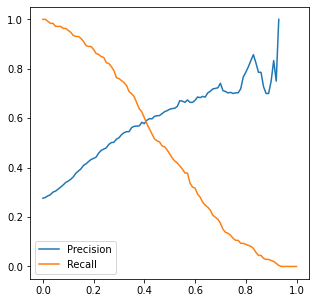

In [104]:
plt.figure(figsize=(5, 5))
plt.plot(df_Q3.threshold, df_Q3.Precision, label="Precision")
plt.plot(df_Q3.threshold, df_Q3.Recall, label="Recall")
plt.legend()

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [105]:
df_Q3["F1"] = 2 * df_Q3.Precision * df_Q3.Recall / (df_Q3.Precision + df_Q3.Recall)

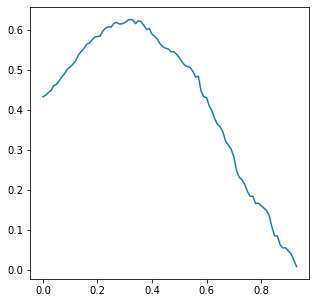

In [106]:
plt.figure(figsize=(5, 5))
plt.plot(df_Q3.threshold, df_Q3.F1, label="F1")

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

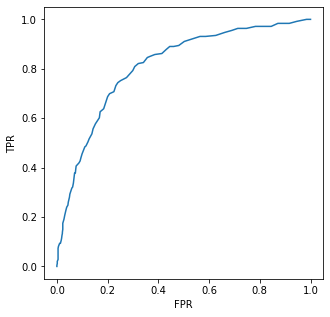

In [118]:
plt.figure(figsize=(5,5))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(df_Q3.fpr, df_Q3.tpr)


In [115]:
auc(df_Q3["fpr"], df_Q3["tpr"])

0.8105754080796621

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [133]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient="records")
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [134]:
def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [135]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [138]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.default.values
    y_val = df_val.default.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    print('%.3f' % auc)

print("### Result ###")
print('Mean %.3f +- STD %.4f' % (np.mean(scores), np.std(scores)))

0.823
0.825
0.788
0.825
0.805
### Result ###
Mean 0.813 +- STD 0.0147


How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std

In [143]:
n_splits = 5

for C in tqdm([0.01, 0.1, 1, 10]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values
        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print('C=%s %.5f +- %.5f' % (C, np.mean(scores), np.std(scores)))
    print()



  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.81335 +- 0.01473

C=0.1 0.81335 +- 0.01473

C=1 0.81335 +- 0.01473

C=10 0.81335 +- 0.01473



Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.